# Variational Inference

1. Check Calcus of variations in Wikipedia
2. [Introduction to Variational Methods for Graphical Models by Jordan, Ghahramani, Jaakkola, Saul](https://people.eecs.berkeley.edu/~jordan/papers/variational-intro.pdf)

---
# A Toy Example

Observation model:
$$
   y_1 \sim N(\mu=1,\sigma^2=1) \\
   p(y_1 | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi}}\exp\left[ -\frac{1}{2} (y_1 - \mu)^2 \right]
$$
- Here we do not know $\mu$ so we want to find a distribution $p(\mu|D)$ using an observation data $D={y_1}$.
- We assume that we know $\sigma=1$.

Prior model:
$$
   p(\mu|\phi, \tau^2=1) = \frac{1}{\sqrt{2\pi}}\exp\left[ -\frac{1}{2} (\mu - \phi)^2 \right]
$$
- We set $\phi = 0$ and $\tau=1$ as our model.
$$
   p(\mu|\phi=0, \tau^2=1) = \frac{1}{\sqrt{2\pi}}\exp\left[ -\frac{1}{2} \mu^2 \right]
$$

Posterior:
$$
   p(\mu|D) = p(D|\mu) p(\mu|0, 1) / p(D) \\
   p(D) = \int p(D|\mu) p(\mu|0, 1) d\mu
$$

Let's try to find $p(\mu|D)$.
1. closed form solution
2. ELBO maximization
3. etc

---

## Closed form solution
First, prior-likelihood or joint density of $D$ and $\mu$.
\begin{align}
   p(D, \mu) & = P(D|\mu) p(\mu) \\
             & = \frac{1}{\sqrt{2\pi}}\exp\left[ -\frac{1}{2} (y_1 - \mu)^2 \right] 
                 \times \frac{1}{\sqrt{2\pi}}\exp\left[ -\frac{1}{2} \mu^2 \right] \\
             & = \frac{1}{2\pi} \exp\left[ -\frac{1}{2} \left(y_1^2 - 2y_1\mu + \mu^2 + \mu^2 \right) \right]
\end{align}
Since,
\begin{align}
   Q(\mu) & = 2\mu^2 - 2y_1\mu + y_1^2 \\
          & = 2(\mu^2 - y_1\mu + y_1^2/4) - y_1^2/2 + y_1^2 \\
          & = 2(\mu - y_1/2)^2 + y^2/2
\end{align}

Second, marginal likelihood or evidence:
\begin{align}
   p(D)  & = \int_\mu p(D, \mu) d\mu \\
         & = \frac{1}{2\pi} \int_\mu \exp\left[ -\frac{1}{2} (\mu - y_1/2)^2 (\sqrt{2})^2 \right] d\mu \times \exp\left[ -\frac{1}{2}(y^2/2) \right] \\
         & = \frac{1}{2\pi} \times \left(\frac{\sqrt{2\pi}}{\sqrt{2}}\right) \times \exp\left[ -\frac{1}{2}(y/\sqrt{2})^2 \right] \\
         & = \frac{1}{\sqrt{2\pi}\sqrt{2}}\exp\left[ -\frac{1}{2}(y/\sqrt{2})^2 \right]
\end{align}

Third, posterior:
\begin{align}
    p(\mu | D) & = \frac{  \frac{1}{2\pi} \exp\left[ -\frac{1}{2} (\mu - y_1/2)^2 (\sqrt{2})^2 \right] \times \exp\left[ -\frac{1}{2}(y^2/2) \right]  }{ \frac{1}{\sqrt{2\pi}\sqrt{2}}\exp\left[ -\frac{1}{2}(y/\sqrt{2})^2 \right] }
    \\
    & =
        \frac{\sqrt{2}}{\sqrt{2\pi}} \exp\left[ -\frac{1}{2} (\mu - y_1/2)^2 (\sqrt{2})^2 \right]
\end{align}
The posterior distribution of $\mu$ is found to be a Gaussain distribution with mean $\frac{y_1}{2}$ and variance $1/2$: 
$$ 
    p(\mu | D) = \mathcal{N}(\mu | \mu_{|D} = \frac{y_1}{2}, \sigma_{|D}^2 = \frac{1}{2})
$$

## ELBO maixmization
### 1. Modeling stage: 
  - After a long thought (lol), we come to think the posterior must be a Gaussian $N(\theta,\lambda)$
  - here $\lambda$ is the inverse of the variance.

$$
    Q(\mu) = Q(\mu | \theta, \lambda) = \mathcal{N}(\mu | \theta, \lambda^{-1})
$$

### 2. ELBO:

\begin{align}
    ELBO(\theta, \lambda) & = \mathbb{E}_{\mu\sim Q(\theta, \lambda)} \left[ \log \frac{p(D,\mu)}{Q(\mu|\theta,\lambda)} \right] \\
        & =
            \mathbb{E}_{\mu\sim Q(\theta, \lambda)} \left[ \log p(D,\mu) - \log Q(\mu|\theta,\lambda) \right] \\
        & =
            \mathbb{E}_{\mu\sim Q(\theta, \lambda)} \left[
                \log\frac{1}{2\pi} - \frac{1}{2} (y_1^2 - 2y_1\mu + 2\mu^2 )
                - \left( \log\frac{\sqrt{\lambda}}{\sqrt{2\pi}}   -\frac{1}{2} \lambda (\mu - \theta)^2 
                \right)
            \right]
            \\
        & = \log\frac{1}{2\pi} - \frac{1}{2} (y_1^2 - 2y_1\theta + 2(\theta^2 + \lambda^{-1}) ) - \frac{1}{2}\log\lambda + \log\sqrt{2\pi} + \frac{1}{2}   
\end{align}
Note:
\begin{align}
            \mathbb{E}[\mu^2] & = \lambda^{-1} + \theta^2 = \sigma_\mu^2 + \theta^2 \\
            \mathbb{E}[(\mu - \theta)^2] & = \sigma_\mu^2 = \lambda^{-1}
\end{align}

### 3. Maximize:
$$
    \hat\theta, \hat\lambda = arg \max_{\theta, \lambda} ELBO(\theta, \lambda)
$$

- For this case, we can apply $\frac{dELBO}{d(\theta,\lambda)} = 0$
$$
    \frac{d\mathrm{ELBO}}{d\theta} = y_1 - 2\theta = 0 \quad \Rightarrow \quad  \hat\theta = \frac{y_1}{2}
$$
$$
    \frac{d\mathrm{ELBO}}{d\lambda} =  \frac{1}{\lambda^2} -\frac{1}{2}\frac{1}{\lambda}  = 0 \quad \Rightarrow \quad  \hat\lambda = 2
$$

Our optimal solution is obtained to be 
$$
    Q(\mu| \theta, \lambda) = \mathcal{N}\left(\mu \bigg| \frac{y_1}{2}, \frac{1}{2} \right)
$$

### Note 1
* 이 문제는 쉽게 풀수 있다. 장난감이다.
* 그러나 일반적으로는 이렇게 풀리지 않는다.
### Note 2: ELBO with MC
* The integral / expectation $\mathbb{E}_{\mu\sim Q}[\log\frac{P}{Q}]$ is not easy to manipulate in practical problems.
* Monte Carlo method may be utilized.
1. Generate random samples $S = \{\mu_i | \mu_i \sim Q, i = 1, ..., N \}$
2. Build up a sample-average version:
$$ 
    \mathrm{ELBO\_MC} (\theta, \lambda) = \frac{1}{N} \sum_{i} \left[ \log P(\mu_i, D) - \log Q(\mu_i| \theta, \lambda^{-1}) \right]
$$
3. Perform optimization such as SGD.
### ELBO with mean field approximation
- References
  1. https://www.cs.cmu.edu/~epxing/Class/10708-17/notes-17/10708-scribe-lecture13.pdf

End.

---

## 1. Logistic Regression Model

$$
    f(x) = 1 / (1 + e^{-x}) = \min_\lambda \{ \exp( \lambda x - H(x) ) \}
$$

For any value of $\lambda$ we obtain an upper bound of the logistic function for all values of $x$:
$$
    f(x) \leq e^{  \lambda x - H(x) }
$$

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [56]:
x = np.linspace(-3.5, 3.5, 100)
f = 1. / (1 + np.exp(-x))
   
#
def get_lambda(x0, choice='best'):
    # 0 < lambda < 1 due to H
    if choice=='best':
        lamb = 1./(1+np.exp(x0))
    else:
        lamb = np.random.uniform(0,1)

    def H(lamb): return -lamb*np.log(lamb) - (1-lamb)*np.log(1-lamb)
    
    return lamb, H

def get_upper_bounds(x, xats, lambda_method='best'):
    ubs = []
    for x0 in xats:
        lambda_star, H = get_lambda(x0, lambda_method)
        ub = np.exp(lambda_star * x - H(lambda_star))
        ubs.append(ub)
    return ubs

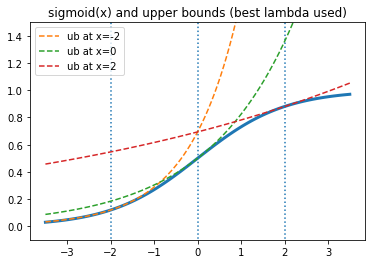

In [57]:
x0s = [-2, 0, 2]
ubs = get_upper_bounds(x, x0s, lambda_method='best')

plt.plot(x, f, linewidth=3);
for ubf, x0 in zip(ubs, x0s):
    plt.plot(x, ubf, '--', label=f'ub at x={x0}')
    plt.vlines(x0, -1, 1.5, linestyles='dotted')
plt.ylim(-.1, 1.5)
plt.legend()
plt.title('sigmoid(x) and upper bounds (best lambda used)');

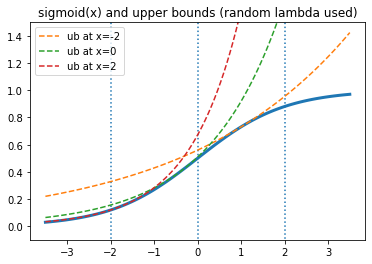

In [58]:
x0s = [-2, 0, 2]
ubs = get_upper_bounds(x, x0s, lambda_method='random')

plt.plot(x, f, linewidth=3);
for ubf, x0 in zip(ubs, x0s):
    plt.plot(x, ubf, '--', label=f'ub at x={x0}')
    plt.vlines(x0, -1, 1.5, linestyles='dotted')
plt.ylim(-.1, 1.5)
plt.legend()
plt.title('sigmoid(x) and upper bounds (random lambda used)');

In this random choice experiment of lambda, the upper bound gap at $x_0$ is large; when it was chosen by optimal method, the gap was zero, both theoretically and practically.

## 4.2. Convex duality to compute the conjugate function

From the theory of convex analysis, a **concave** function $f(x)$ can be represented via a conjugate or dual function $f^*$

$$
    f(x) = \min_\lambda \{ \lambda^T x - f^*(\lambda) \}
$$

The conjugate (dual) can be obtained by the following dual expression:

$$
    f^*(x) = \min_\lambda \{ \lambda^T x - f(\lambda) \}
$$

See Figure 16 in the paer.

A **convex** function $f(x)$ can be represented via a conjugate or dual function $f^*$

$$
    f(x) = \max_\lambda \{ \lambda^T x - f^*(\lambda) \}
$$

The conjugate (dual) can be obtained by the following dual expression:

$$
    f^*(x) = \max_\lambda \{ \lambda^T x - f(\lambda) \}
$$